<a href="https://colab.research.google.com/github/jugernaut/Numerico2021/blob/master/04_Interpolacion/01_Interpolacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Interpolación</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M.en.C. Miguel Ángel Pérez León.</i></h5>
    <h5 align="center"><i>Ayudante: Jesús Iván Coss Calderón.</i></h5>
  <h5 align="center"><i>Materia: Análisis Numérico.</i></h5>
  </font>

##  Introducción

La interpolación es una de las técnicas más comunes para que, a partir de un conjunto de datos conocidos, se pueda identificar uno o más valores desconocidos dentro de este rango de datos. Y para esta labor se emplea una de las clases de funciones más útiles y mejor conocidas que mapea el conjunto de los números reales sobre si mismo, los **polinomios algebraicos**.

Supongamos que se tiene un punto $\left(x_{0},f(x_{0})\right)$ en el plano, y se quiere encontrar una función $f(x)$ que al ser evaluada en $x_{0}$ pase por el punto $\left(x_{0},f(x_{0})\right)$, llamaremos a esa aproximación

$$P_{0}(x)$$

Entonces se tiene que $P_{0}(x)=f(x)=f(x_{0})$

Es decir que $P_{0}(x)$, el polinomio de grado cero, es una constante $f(x_{0})$ que pasa por el punto $\left(x_{0},f(x_{0})\right)$.

Recordemos un poco como es que las series de Taylor, nos ayudaban a generar una aproximación de una función dada.

In [ ]:
# COLAB
!git clone https://github.com/jugernaut/Numerico2021.git
import Numerico2021.Utils.gutils as vis
import numpy as np

%run "/content/Numerico2021/04_Interpolacion/zSeriesDeTaylor_interactive.ipynb"

Cloning into 'Numerico2021'...
remote: Enumerating objects: 247, done.
remote: Counting objects: 100% (247/247), done.
remote: Compressing objects: 100% (247/247), done.
remote: Total 2661 (delta 152), reused 0 (delta 0), pack-reused 2414
Receiving objects: 100% (2661/2661), 11.78 MiB | 27.35 MiB/s, done.
Resolving deltas: 100% (1694/1694), done.


interactive(children=(Dropdown(description='función', options=(cos(x), sin(x), tan(x), exp(x), exp(-x**2), exp…

<function __main__.calcTaylor>

##  Polinomio de Lagrange

Ahora supongamos que se conocen 2 puntos $\left(x_{0},f(x_{0})\right)\,y\,\left(x_{1},f(x_{1})\right)$ y se busca encontrar la interpolación lineal que conecta a ambos puntos.

Una linea recta es usada para conectar estos 2 valores (datos) $f(x_{0})$ y $f(x_{1})$ en $x_{0}$ y $x_{1}$ respectivamente. La linea recta es representada por una función lineal de la forma $f(x)=ax+b$, donde $a,b$ son constantes y pueden ser determinadas usando el valor en los puntos $x_{0}$ y $x_{1}$ así.

$$ x=x_{0}:f(x_{0})=ax_{0}+b \tag{1}$$

$$ x=x_{1}:f(x_{1})=ax_{1}+b \tag{2}$$


Para encontrar la pendiente de la recta que conecta a estos puntos, es necesario restar $f(x_{1})-f(x_{0})$, es decir

$$f(x_{1})-f(x_{0})=ax_{1}+b-ax_{0}-b=ax_{1}-ax_{0}\Longrightarrow{a=\frac{f(x_{1})-f(x_{0})}{x_{1}-x_{0}}}$$

Substituyendo $a$ en (1) se tiene que

$$f(x_{0})=\frac{f(x_{1})-f(x_{0})}{x_{1}-x_{0}}x_{0}+b\Longrightarrow{b=f(x_{0})-\frac{f(x_{1})-f(x_{0})}{x_{1}-x_{0}}x_{0}}$$

De tal manera que si substituimos $a$ y $b$ en la ecuación paramétrica de la recta $f(x)=ax+b$, obtenemos


$$f(x)=\frac{f(x_{1})-f(x_{0})}{x_{1}-x_{0}}x+f(x_{0})-\frac{f(x_{1})-f(x_{0})}{x_{1}-x_{0}}x_{0} \tag{3}$$


Y ahora (3) se puede reescribir como

$$f(x)	=	\frac{xf(x_{1})-xf(x_{0})-x_{0}f(x_{1})+x_{0}f(x_{0})}{x_{1}-x_{0}}+\frac{x_{1}-x_{0}}{x_{1}-x_{0}}f(x_{0})
	=	\frac{xf(x_{1})-xf(x_{0})-x_{0}f(x_{1})+x_{0}f(x_{0})+x_{1}f(x_{0})-x_{0}f(x_{0})}{x_{1}-x_{0}}
	=	\frac{\left(x_{1}-x\right)f(x_{0})+\left(x-x_{0}\right)f(x_{1})}{x_{1}-x_{0}}$$
    

$$f(x)=\left(\frac{x-x_{1}}{x_{0}-x_{1}}\right)f(x_{0})+\left(\frac{x_{0}-x}{x_{0}-x_{1}}\right)f(x_{1})$$

Que en forma de polinomio se define así

$$P_{1}(x) := L_{0}(x)f(x_{0})+L_{1}(x)f(x_{1})\ldots Polinomio\,de\,Lagrange\,de\,grado\,1$$

Si se evalúa $x_{0}$ en el Polinomio de Lagrange de grado 1 se obtiene

$${\color{blue}{P(x_{0})}}=\left(\frac{x_{0}-x_{1}}{x_{0}-x_{1}}\right)f(x_{0})+\left(\frac{x_{0}-x_{0}}{x_{0}-x_{1}}\right)f(x_{1})={\color{blue}{f(x_{0})}} $$

De igual manera, al evaluar $x_{1}$ 

$${\color{blue}{P(x_{1})}}=\left(\frac{x_{1}-x_{1}}{x_{0}-x_{1}}\right)f(x_{0})+\left(\frac{x_{0}-x_{1}}{x_{0}-x_{1}}\right)f(x_{1})={\color{blue}{f(x_{1})}} $$

Para calcular el polinomio de Lagrange de grado 2 es necesario conocer 3 puntos (datos) y se tendría

$$f(x)=ax^{2}+bx+c\\
f(x) \thickapprox L_{0}(x)f(x_{0})+L_{1}(x)f(x_{1})+L_{2}(x)f(x_{2})$$

Donde

$$L_{0}(x)	=	\frac{\left(x-x_{1}\right)\left(x-x_{2}\right)}{\left(x_{0}-x_{1}\right)\left(x_{0}-x_{2}\right)},\quad L_{1}(x)=\frac{\left(x-x_{0}\right)\left(x-x_{2}\right)}{\left(x_{1}-x_{0}\right)\left(x_{1}-x_{2}\right)}, \quad L_{2}=\frac{\left(x-x_{0}\right)\left(x-x_{1}\right)}{\left(x_{2}-x_{0}\right)\left(x_{2}-x_{1}\right)} $$

### Teorema

Si $x_{0},x_{1},\ldots x_{n}$ son $n+1$ números distintos y si $f$ es una función cuyos valores están dados en estos números, entonces existe un polinomio $P(x)$ de grado máximo $n$. Dicho polinomio se define así

$$P(x):= L_{0}(x)f(x_{0})+\cdots+L_{n}(x)f(x_{n})=\sum_{i=0}^{n}L_{i}(x)f(x_{i})$$,

Donde para cada $i=0,1,\ldots,n,$

$$L_{i}(x) := \frac{\left(x-x_{0}\right)\left(x-x_{1}\right)\cdots\left(x-x_{i-1}\right)\left(x-x_{i+1}\right)\cdots\left(x-x_{n}\right)}{\left(x_{i}-x_{0}\right)\left(x_{i}-x_{1}\right)\cdots\left(x_{i}-x_{i-1}\right)\left(x_{i}-x_{i+1}\right)\cdots\left(x_{i}-x_{n}\right)}=\prod_{\begin{array}{c}
i=0\\
i\neq k
\end{array}}^{n}\frac{\left(x-x_{i}\right)}{\left(x_{k}-x_{i}\right)}$$

#### Ejemplo

Sea el siguiente conjunto de datos

| X | 1 |  4 | 7|
| :-:  | :-: | :-: |  :-: |
| Y  | 52 |-5 |10|


1. Determine el polinomio de Lagrange de segundo orden que pasa por cada uno de los puntos.

2. Use el polinomio calculado en (1) para encontrar el valor interpolado en $x=3$.

Solución: $f\left(x\right)=4x^{2}-39x+87\qquad f(3)=6$

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/interpolacion/algLagrange.PNG?raw=1" width="500">

In [ ]:
''' Interpolador de Lagrange
f: lista de datos (x0,y0),...,(xn,yn)
xi: punto en el que se evalua el polinomio
'''
def interpoladorLagrange(f, xi):
    # variable para almacenar el resultado
    result = 0.0
    # longitud de los datos
    n = len(f)
    # ciclos para realizar la suma de multiplicaciones
    for i in range (n):
        # f(xi)=yi
        term = f[i][1]
        # for para calcular el coeficiente de Lagrange (Li)
        for j in range(n):
            # combinaciones en las que j!=i (revisar definicion de Li)
            if (j!=i):
                # Li*f(xi)
                term = (xi - f[j][0])/(f[i][0] - f[j][0])*term
        # se suma el Li*f(xi) con el resto de los valores evaluados
        result += term
    # se devuelve el resultado
    return result 

# lista de valores
f = ((1.0,52.0), (4.0,-5.0), (7.0,10.0))
# datos extendidos
# f = ((1.0,52.0), (2.0,5.0),(4.0,-5.0), (5.0,-40.0), (7.0,10.0))
# resultado de la interpolacion en 3.0
print(interpoladorLagrange(f, 3.0))

# validacion del interpolador
# valor esperado 52
print(interpoladorLagrange(f, 1.0))
# valor esperado -5
print(interpoladorLagrange(f, 4.0))
# valor esperado 10
print(interpoladorLagrange(f, 7.0))

5.999999999999999
52.0
-5.0
10.0


### Estimación del error

Es importante notar que si se conoce la función $\left(f(x)\right)$ que se quiere aproximar, basta con evaluarla en los puntos necesarios para poder construir el polinomio interpolador.

Incluso, si se conoce la solución analítica $\left(f(x)\right)$ podemos dar una estimación del error y una cota para el error de la solución numérica.

### Teorema

Formula del error de la interpolación polinomial:

Sean $x_{0},\ldots,x_{n}\in\left[a,b\right]$, $n+1$ nodos de interpolación y sea $f\in C^{n+1}\left[a,b\right]$. Si $x\in\left[a,b\right]$, entonces 

$$f(x)=P_{n}(x)+E_{n}(x)$$

donde $P_{n}(x)$ es el polinomio que interpola $f(x)$ en los $n+1$ nodos y que podemos usar para aproximar 

$$f(x)\approx P_{n}(x)=\sum_{i=0}^{n}L_{i}(x)f(x_{i})$$

Podemos afirmar que el termino de error $E_{n}(x)$ se puede calcular así

$$E_{n}(x)=\left|f(x)-P_{n}(x)\right|=\frac{\left(x-x_{0}\right)\left(x-x_{1}\right)\cdots\left(x-x_{n}\right)f^{(n+1)}(\xi)}{\left(n+1\right)!}$$


Este teorema afirma la existencia de un numero $\xi=\xi(x)\in\left[a,b\right]$, sin embargo no se proporciona ningún procedimiento cómodo para calcularlo.

En la práctica se calcula de la siguiente manera

$$\xi=\sup_{x\in\left[a,b\right]}\left|f^{n+1}(x)\right|$$

 
Dado que ya conocemos una forma de calcular el polinomio interpolador dada una función y ademas podemos dar una estimación del error, procedamos a aplicar lo conocido a la función 

$$f(x)=2xe^{-\left(4x+2\right)}$$

#### Ejemplo

Sea la función $f(x)=2xe^{-\left(4x+2\right)} $definida en el intervalo $[0.2,1]$

1. Determine el polinomio de Lagrange que interpola $f(x)$ en los punto de interpolación $\{0.2,1.0\}.$

2. Obtener la expresión del error de interpolación

#### Solución

$$L_{0}(x)=\frac{x-x_{1}}{x_{0}-x_{1}}=\frac{1-x}{0.8},\quad L_{1}(x)=\frac{x-x_{0}}{x_{1}-x_{0}}=\frac{x-0.2}{0.8}$$

Por lo tanto 

$$P_{1}(x)=L_{0}(x)f(x_{0})+L_{1}(x)f(x_{1})=\frac{1-x}{0.8}\left(0.4\right)e^{-2.8}+\frac{x-0.2}{0.8}2e^{-6}$$


Por otra parte aplicando el teorema para la estimación del error se tiene

$$E_{n}(x)=\left|f(x)-P_{n}(x)\right|=\frac{\left(x-x_{0}\right)\left(x-x_{1}\right)\cdots\left(x-x_{n}\right)f^{(n+1)}(\xi)}{\left(n+1\right)!}$$

Como se tienen 2 puntos de interpolación, es necesario calcular la segunda derivada de f 

$$f'(x)=\left(2-8x\right)e^{-(4x+2)}\quad f''(x)=\left(-16+32x\right)e^{-(4x+2)}$$

Por lo tanto podemos concluir que

$$E_{n}(x)=\left|f(x)-P_{n}(x)\right|=\frac{\left(x^{2}-1.2x+0.2\right)\left(-16+32\xi\right)e^{-(4\xi+2)}}{2}$$

##  Polinomio de Newton

Supongamos que $P_{n}\left(x\right)$ es el $n-esimo$ polinomio de Lagrange que concuerda con la función $f$ en los números distintos $x_{0},x_{1},\ldots,x_{n}$. 


Las **diferencias divididas** de $f$ respecto a $x_{0},x_{1},\ldots,x_{n}$ se usan para expresar $P_{n}\left(x\right)$ en la forma 

$$P_{n}\left(x\right)=a_{0}+a_{1}\left(x-x_{0}\right)+a_{2}\left(x-x_{0}\right)\left(x-x_{1}\right)+\cdots+a_{n}\left(x-x_{0}\right)\cdots\left(x-x_{n-1}\right) \tag{4}$$

para las constantes apropiadas $a_{0},a_{1},\ldots,a_{n}$. Para determinar la primera de las constantes $a_{0}$ note que si $P_{n}\left(x\right)$ esta escrito en la forma de la ecuación (4), entonces al evaluar en $x_{0}$ obtenemos 

$$P_{n}\left(x_{0}\right)=a_{0}=f\left(x_{0}\right)$$

De manera similar , cuando $P_{n}\left(x\right)$ en $x=x_{1}$ 

$$P_{n}\left(x_{1}\right)=f\left(x_{0}\right)+a_{1}\left(x_{1}-x_{0}\right)=f\left(x_{1}\right);\quad as\acute{\imath}\,que \quad a_{1}=\frac{f\left(x_{1}\right)-f\left(x_{0}\right)}{x_{1}-x_{0}} $$

La diferencia dividida cero de la función $f$ respecto a $x_{i}$ , que se denota como $f\left[x_{i}\right]$, es simplemente el valor de f en $x_{i}$ , es decir, $f\left[x_{i}\right]=f\left(x_{i}\right)$.

El resto de las diferencias divididas se definen en forma recursiva. La primera diferencia dividida de $f$ respecto a $x_{i}$ y $x_{i+1}$ se denota $f\left[x_{i},x_{i+1}\right]$ se define así.

$$f\left[x_{i},x_{i+1}\right]=\frac{f\left[x_{i+1}\right]-f\left[x_{i}\right]}{x_{i+1}-x_{i}}$$

La segunda diferencia dividida, $f\left[x_{i},x_{i+1},x_{i+2}\right]$, se define como 

$$f\left[x_{i},x_{i+1},x_{i+2}\right]=\frac{f\left[x_{i+1},x_{i+2}\right]-f\left[x_{i},x_{i+1}\right]}{x_{i+2}-x_{i}}$$

La $k-esima$ diferencia dividida respecto a $x_{i},x_{i+1},\ldots,x_{i+k}$ es 

$$f\left[x_{i},x_{i+1},\cdots,x_{i+k}\right]=\frac{f\left[x_{i+1},x_{i+2},\cdots x_{i+k}\right]-f\left[x_{i},x_{i+1},\cdots,x_{i+k-1}\right]}{x_{i+k}-x_{i}}$$

El proceso termina con la única $n-\acute{e}sima$ diferencia dividida, $$f\left[x_{0},x_{1},\cdots,x_{n}\right]=\frac{f\left[x_{1},x_{2},\cdots x_{n}\right]-f\left[x_{0},x_{1},\cdots,x_{n-1}\right]}{x_{n}-x_{0}}$$

En su forma extendida podémos pensar en el polinomio de Newton así.

$$P_{n}\left(x\right)=f\left[x_{0}\right]+f\left[x_{0},x_{1}\right]\left(x-x_{0}\right)+f\left[x_{0},x_{1},x_{2}\right]\left(x-x_{0}\right)+\left(x-x_{1}\right)+\cdots+f\left[x_{0},x_{1},\ldots,x_{n}\right]\left(x-x_{0}\right)+\left(x-x_{1}\right),\ldots,\left(x-x_{n-1}\right)$$

Por lo tanto, podemos reescribir $P_{n}\left(x\right)$ en su forma compacta como. 

$$P_{n}\left(x\right)=f\left[x_{0}\right]+\sum_{k=1}^{n}f\left[x_{0},x_{1},\cdots x_{k}\right]\left(x-x_{0}\right)\left(x-x_{1}\right)\cdots\left(x-x_{k-1}\right)$$

###  Ejemplo

Sea el siguiente conjunto de datos

| X | 1 |2|  4 |5| 7|
| :-:  | :-: | :-: |  :-: | :-: | :-: |
| Y  | 52 |5|-5|-40 |10|

1. Determine el polinomio de Newton de cuarto orden que pasa por cada uno de los puntos. Calcule los coeficientes usando una tabla de diferencias divididas.

2. Use el polinomio calculado en (1) para encontrar el valor interpolado en $x=3$.

###  Solución 

Creando la tabla de diferencias divididas, de acuerdo al algoritmo descrito previamente se tiene.

| i        | $x$            | $f(x)$ | $D_0$| $D_1$| $D_2$| $D_3$
| :-:           |    :-:        | :-:        | :-:        | :-:        | :-:        | :-:        | 
| $0$   | $1$ | ${\color{red}{52}}$ | $\frac{5-52}{x_{1}-x_{0}}={\color{red}{-47}}$   | $\frac{-5+47}{x_{2}-x_{0}}={\color{red}{14}}$ | $\frac{-10-14}{x_{3}-x_{0}}={\color{red}{-6}}$  | $\frac{6+6}{x_{4}-x_{0}}={\color{red}{2}}$   | 
| $1$   | $2$ | $5$ | $\frac{-5-5}{x_{2}-x_{1}}=-5$ |$\frac{-35+5}{x_{3}-x_{1}}=-10$   | $\frac{20+10}{x_{4}-x_{1}}=6$ |
| $2$   | $4$ | $-5$ | $\frac{-40+5}{x_{3}-x_{2}}=-35$ |$\frac{25+35}{x_{4}-x_{2}}=20$   | 
| $3$   | $5$ | $-40$ | $\frac{10+40}{x_{4}-x_{3}}=25$ |
| $4$   | $7$ | $10$ |

$$P_{4}\left(x\right)={\color{blue}{\color{red}{52}}}-{\color{red}{47}}\left(x-1\right)+{\color{blue}{\color{red}{14}}}\left(x-1\right)\left(x-2\right)-{\color{blue}{\color{red}{6}}}\left(x-1\right)\left(x-2\right)\left(x-4\right)+{\color{red}{2}}\left(x-1\right)\left(x-2\right)\left(x-4\right)\left(x-5\right).$$

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/interpolacion/coefNew.PNG?raw=1" width="700">

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/interpolacion/Algnew.PNG?raw=1" width="700">

In [ ]:
import numpy as np

''' Algoritmo que implementa el polinomio de Newton
    x: conjunto de valores en el eje x
    f: conjunto de valores en el eje y
    F[0]: coeficientes del polinomio de Newton
'''
def diferenciasDiv(x,f):
    #generamos la matriz de diferencias divididas
    F = np.zeros((len(x),len(x)))
    #la primer columna siempre son los valores de y
    for i in range(len(x)):
        F[i][0] = f[i]
    #se calcula la columna j, tomado como base la columna previa
    for j in range(1,len(x)):
        for i in range(len(x)-j):
            #se deja fija la columna y se desplaza sobre los renglones
            F[i][j] = (F[i+1][j-1]-F[i][j-1])/(x[i+j]-x[i])
    return F[0]    

''' Funcion que vevuelve la evaluacion de un valor
    x: conjunto de valores en el eje x
    coef: coeficientes del polinomio de Newton
    punto: valor en el cual se busca interpolar
    resultado: valor de la interpolacion en el valor xi
'''
def interpoladorNewton(x, coef, punto):
    # primer valor igual al termino independiente (revisar ejemplo)
    resultado = coef[0]
    # par de ciclos para evaluar el resto de los coeficientes
    for i in range(1, len(coef)):
        # siguiente coeficiente
        evaluacion = coef[i]
        # ciclo que evalua (x-xj)
        for j in range(i):
            evaluacion *= (punto-x[j])
        # se suma el resultado a lo ya calculado
        resultado += evaluacion
    # se devuelve el resultado
    return resultado

# datos en la forma (x,y)
# x = (1.0,4.0,7.0)
# y = (52.0,-5.0,10.0)
# datos extendidos
x = (1.0,2.0,4.0,5.0,7.0)
y = (52.0,5.0,-5.0,-40.0,10.0)
# coeficientes (ai's) del polinomio de Newton
coef = diferenciasDiv(x,y)
# se muestran los coeficientes ai (diferencias divididas)
print(coef)
# resultado de la interpolacion en 3
print('Interpolacion en 3.0: ',interpoladorNewton(x, coef, 3.0))
# validacion de resultados
# resultado esperado 52
print(interpoladorNewton(x, coef, 1.0))
# resultado esperado 5
print(interpoladorNewton(x, coef, 2.0))
# resultado esperado -5
print(interpoladorNewton(x, coef, 4.0))
# resultado esperado -40
print(interpoladorNewton(x, coef, 5.0))
# resultado esperado 10
print(interpoladorNewton(x, coef, 7.0))

[ 52. -47.  14.  -6.   2.]
Interpolacion en 3.0:  6.0
52.0
5.0
-5.0
-40.0
10.0


## Comparativa Lagrange v.s. Newton

Sea $f(x) = -x^{3}+e^{x}-seno(3x)$, veamos como funcionan estos interpoladores en $ x = 0,2,4,5$

Error cuadratico medio Lagrange: 9.86916309047777
Error cuadratico medio Newton: 9.86916309047777


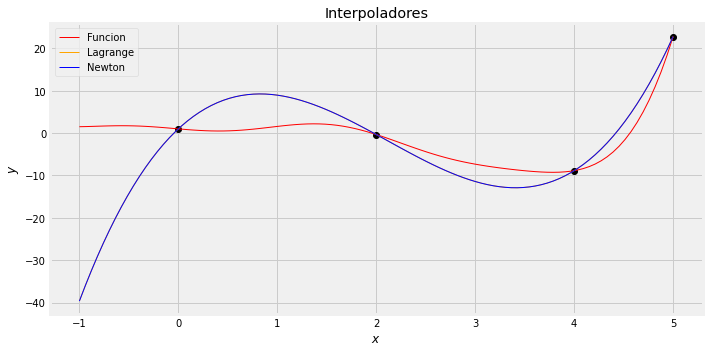

In [ ]:
'''
Funcion que genera la grafica del interpolador
de Lagrange
f: funcion a interpolar f(x)
x: valores a interpolar
x_plot: valores para graficar
'''
def grafLagrange(f, x, x_plot):
    # se generan los datos (x, f(x))
    datos = [[i, f(i)] for i in x]
    # evaluacion del interpolador de Lagrange
    yl = interpoladorLagrange(datos, x_plot)
    # se devuelven los valores de la interpolacion
    return yl    

'''
Funcion que genera la grafica del interpolador
de Newton
f: funcion a interpolar f(x)
x: valores a interpolar
x_plot: valores para graficar
''' 
def grafNewton(f, x, x_plot):
    # se generan los datos para interpolar (x,f(x))
    fx = [f(i) for i in x]
    # coeficientes del polinomio interpolador de Newton
    coef = diferenciasDiv(x, fx)
    # evaluacion del interpolador de Lagrange
    yn = interpoladorNewton(x, coef, x_plot)
    # valores de la funcion real
    return yn

# funcion que grafica ambos interpoladores
def grafInterpoladores():
    # funcion a interpolar
    funcion = lambda x: ((-x)**(3))+(np.e**(x))-np.sin((x)*3)
    # dominio a graficar
    x_plot = np.linspace(-1., 5., 100)
    # imagen de la funcion
    y_plot = funcion(x_plot)
    # datos para interolar
    x_inter = [0., 2., 4., 5.] 
    # puntos de interpolacion
    y_inter = [funcion(i) for i in x_inter]
    # valores del interpolador de Lagrange
    lagrange = grafLagrange(funcion, x_inter, x_plot)
    # valores del interpolador de Newton
    newton = grafNewton(funcion, x_inter, x_plot)
    # error del interpolador de Lagrange
    eLagrange = vis.RMS(y_plot, lagrange)
    # error del interpolador de Newton
    eNewton = vis.RMS(y_plot, newton)
    # parametros de la grafica
    par = [{'title':'Interpoladores', 
            'xlabel':'$x$',
            'ylabel':'$y$'}]
    graf = vis.planoCartesiano(par=par)
    # funcion a interpolar
    graf.plot(x=x_plot, y=y_plot, par={'ls':'-', 'lw':1, 'color':'red', 'label':'Funcion'})
    # interpolador Lagrange
    graf.plot(x=x_plot, y=lagrange, par={'ls':'-', 'lw':1, 'color':'orange', 'label':'Lagrange'})
    # interpolador Newton
    graf.plot(x=x_plot, y=newton, par={'ls':'-', 'lw':1, 'color':'blue', 'label':'Newton'})
    # puntos a interpolar
    graf.scatter(x=x_inter, y=y_inter, par={'ls':'-', 'lw':1, 'color':'black'})
    # leyendas de la grafica
    graf.legend()
    # errores
    print('Error cuadratico medio Lagrange: '+str(eLagrange))
    print('Error cuadratico medio Newton: '+str(eNewton))
    # se muestra la grafica
    graf.show()

# se llama a la funcion principal
grafInterpoladores()

##  Fenómeno de Runge

En la mayor parte del tema de interpolación se asume que

$$\lim_{n\rightarrow\infty}\left\Vert f\left(x\right)-P_{n}\left(x\right)\right\Vert =0$$

Es decir que si el grado del polinomio interpolador tiende a infinito, entonces el error entre la solución real y la aproximación será igual a cero.

Sin embargo, esto no es siempre cierto, ya que la cota del error depende de que las derivadas de $f\left(x\right)$ no crezcan demasiado rápido.

Este hecho se expresa en la existencia de funciones para las cuales, la sucesión $\left\{ P_{n}\left(x\right)\right\}$  diverge conforme $n$ crece. Carl David Runge, demostró en 1901 que para la función de Runge

$$f\left(x\right)=\frac{1}{1+x^{2}}$$

La sucesión $\left\{ P_{n}\left(x\right)\right\}$ , de polinomios que la interpola con $n+1$ puntos distribuidos uniformemente en el intervalo $\left[-5,5\right]$, diverge conforme $n$ crece indefinidamente. 

Es debido a este fenómeno, que técnicas como los splines surgen para contraponerse a estas dificultades.

<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/interpolacion/Runge.png?raw=1" width="650">

Ilustración del fenómeno de Runge. La línea discontinua muestra la función de Runge, la continua el polinomio interpolador de Lagrange y los asteriscos la función en los nodos de interpolación.

Las figura superior izquierda y derecha utilizan 11 y 22 nodos
de interpolación en el intervalo $[−5, 5]$, respectivamente, y las figuras inferior izquierda y derecha, 11 y 41 nodos en $[−1, 1]$, respectivamente.


#  Referencias

*   http://www.ugr.es/~mibanez/ejemplos/interpolacion.pdf
*   http://www.lcc.uma.es/~villa/tn/tema06.pdf
*   Riswan Butt, Numerical Analysys Using Matlab, Jones and Bartlett.
*   Ward Cheney, David Kincaid, Métodos Numéricos y Computación, Cenage Learning.
*   Richard L. Burden, J. Douglas Faires, Análisis Numérico, Math Learning.
*   Yuri N. Skiba, Introducción a los Métodos Numéricos.
*   https://www.unioviedo.es/compnum/labs/PYTHON/Interpolation.html